# Parameters

Qlasskit allow to create `qlassf` function with parameters. Those parameters are not free variables of the final circuit, and need to be bound before compilation.

In the next example we define `test` with a parameter `a`; after binding the parameter `a` to `True`, the final function expression will be `b`.

In [1]:
from qlasskit import qlassf, Parameter


@qlassf
def test(a: Parameter[bool], b: bool) -> bool:
    return a and b


qf = test.bind(a=True)
qf.expressions

[(_ret, b)]

Parameterizable qlassf also supports custom types, and complex types like `Qlist` and `Qtuple`.

In [2]:
from qlasskit import Qlist, Qint, Qint4


@qlassf
def test(a: Parameter[Qlist[Qint[2], 4]], b: Qint[4]) -> Qint[4]:
    s = Qint4(0)
    for n in a:
        s += n
    return s + b


qf = test.bind(a=[2, 1, 0, 3])
qf.expressions

[(_ret.0, b.0),
 (_ret.1, ~b.1),
 (_ret.2, ~(b.1 ^ b.2)),
 (_ret.3, b.2 ^ b.3 ^ (b.1 & ~b.2))]

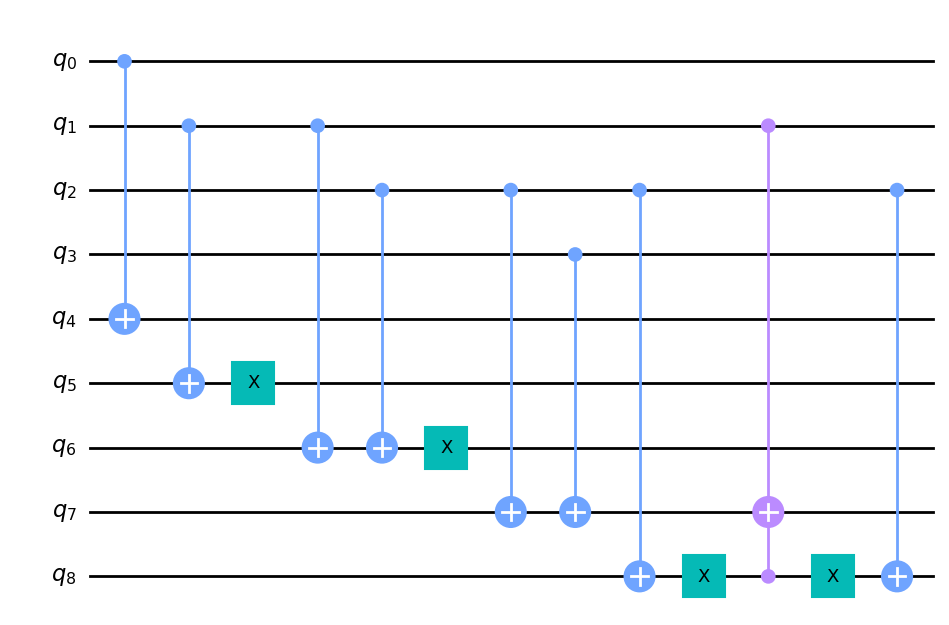

In [3]:
qf.circuit().export().draw("mpl")